## Exploration Data Analysis and Data Preprocessing

In [1]:
%cd /Users/amy/Desktop/Python Bootcamp/projec1_data

[WinError 3] The system cannot find the path specified: '/Users/amy/Desktop/Python Bootcamp/projec1_data'
d:\OneDrive\SeeU\Python Bootcamp\Projects


C:\Users\Legion_Slim-7i\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

ModuleNotFoundError: No module named 'sklearn'

In [235]:
df = pd.read_csv('aug_train.csv')
df_raw = df.copy()
df_test = pd.read_csv('aug_test.csv')
df_test_target = pd.read_csv('sample_submission.csv')

In [236]:
# # importance of join
# df_test_comb = pd.merge(df_test,df_test_target,on='enrollee_id',how='inner')
# df = df_train.append(df_test_comb)
# df_raw = df.copy()

### understand the feature and values

In [237]:
for x in df.columns:
    print('-----COLUMNS-----', x)
    print(df[x].dtype)
    print(df[x].unique().tolist()[:20])

-----COLUMNS----- enrollee_id
int64
[8949, 29725, 11561, 33241, 666, 21651, 28806, 402, 27107, 699, 29452, 23853, 25619, 5826, 8722, 6588, 4167, 5764, 2156, 11399]
-----COLUMNS----- city
object
['city_103', 'city_40', 'city_21', 'city_115', 'city_162', 'city_176', 'city_160', 'city_46', 'city_61', 'city_114', 'city_13', 'city_159', 'city_102', 'city_67', 'city_100', 'city_16', 'city_71', 'city_104', 'city_64', 'city_101']
-----COLUMNS----- city_development_index
float64
[0.92, 0.7759999999999999, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926, 0.8270000000000001, 0.843, 0.804, 0.855, 0.887, 0.91, 0.884, 0.924, 0.6659999999999999, 0.5579999999999999, 0.923]
-----COLUMNS----- gender
object
['Male', nan, 'Female', 'Other']
-----COLUMNS----- relevent_experience
object
['Has relevent experience', 'No relevent experience']
-----COLUMNS----- enrolled_university
object
['no_enrollment', 'Full time course', nan, 'Part time course']
-----COLUMNS----- education_level
object
['Graduate', 'Masters

In [238]:
# 'enrollee_id' : Remove, not use in Modeling
# 'city' : 

## Explore and identify preprocessing steps

In [239]:
# count of missing value per column
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [240]:
# count of missing value per row
missing_value_row = pd.DataFrame(df.isnull().sum(axis=1))
missing_value_row[0].value_counts()

0    8955
1    3718
2    3654
3    1953
4     628
5     176
6      62
7      12
Name: 0, dtype: int64

In [241]:
# examine the row that has way too many missing value
missing_value_row[missing_value_row[0]==7]

,0
1376,7
2518,7
7746,7
8905,7
9206,7
10337,7
11789,7
12079,7
12348,7
13236,7


In [242]:
df[1376:]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1376,30685,city_103,0.920,NaN,Has relevent experience,NaN,NaN,NaN,6,NaN,NaN,NaN,156,0.0
1377,31595,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,58,0.0
1378,23812,city_28,0.939,Male,Has relevent experience,Full time course,High School,NaN,8,NaN,NaN,never,180,0.0
1379,16712,city_74,0.579,Male,Has relevent experience,no_enrollment,Masters,Humanities,10,NaN,NaN,never,27,0.0
1380,7174,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,5000-9999,NGO,2,246,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [243]:
df.shape

(19158, 14)

In [244]:
# drop the row if less than 10 non-null value . 14 total column - 5missing colum = 9 , 9+1 = 10 at least 10 non-missing value
# remove 250 records thats has more than 5 missing value in a record
df.dropna(axis=0, thresh=10, inplace=True) # drop the row, at least 10 non missing value


In [245]:
df.shape

(18908, 14)

In [246]:
df.isnull().sum()


enrollee_id                  0
city                         0
city_development_index       0
gender                    4300
relevent_experience          0
enrolled_university        271
education_level            284
major_discipline          2572
experience                  46
company_size              5695
company_type              5894
last_new_job               335
training_hours               0
target                       0
dtype: int64

#### City

In [247]:
# save as dictionary of each city counts
city_dict = df['city'].value_counts().to_dict()

In [248]:
## Binning , categorize all count of candidate <=50 as one group'small_city'
lst_small_city=[]
lst_med_city=[]
lst_large_city=[]
lst_superlarge_city=[]
for key,value in city_dict.items():
    if value <=50:
        lst_small_city.append(key)
    if value >50 and value <=100:
        lst_med_city.append(key)
    if value >100 and value <=200:
        lst_large_city.append(key)
    else:
        lst_superlarge_city.append(key)

In [249]:
# replace those small city name as 'city_small'

df.loc[df['city'].isin(lst_small_city) , 'city'] = 'city_small'
df.loc[df['city'].isin(lst_med_city) , 'city'] = 'city_med'
df.loc[df['city'].isin(lst_large_city) , 'city'] = 'city_large'
df.loc[df['city'].isin(lst_superlarge_city) , 'city'] = 'city_xlarge'

In [250]:
df.city.value_counts()

city_xlarge    13615
city_large      2566
city_med        1457
city_small      1270
Name: city, dtype: int64

In [251]:
le = LabelEncoder().fit(df['city'])
CityList = le.classes_
df['city'] = le.transform(df['city'])

In [252]:
# Keep the record of labeling
dict(zip(le.classes_, le.transform(le.classes_)))


{'city_large': 0, 'city_med': 1, 'city_small': 2, 'city_xlarge': 3}

#### city_development_index

<AxesSubplot:xlabel='city_development_index'>

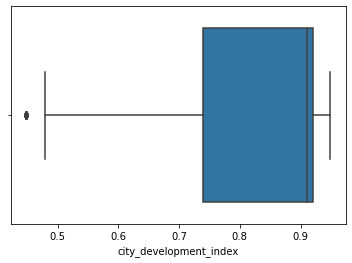

In [253]:
######## TODO: check outlier, needs for normalization?
sns.boxplot(x=df['city_development_index'])

In [254]:
# List out all the outlier
q1 = np.quantile(df['city_development_index'], 0.25)
q3 = np.quantile(df['city_development_index'], 0.75)
# finding the iqr region
iqr = q3-q1
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

df.loc[(df['city_development_index']<=lower_bound)|(df['city_development_index']>=upper_bound)]

0.18000000000000005 1.1900000000000002 0.4699999999999999


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,8238,2,0.448,NaN,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,30985,2,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,43,1.0
5010,27970,2,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,never,73,1.0
5265,31194,2,0.448,NaN,No relevent experience,NaN,High School,NaN,5,NaN,Pvt Ltd,never,86,1.0
5567,598,2,0.448,NaN,Has relevent experience,Part time course,Masters,STEM,6,NaN,NaN,1,18,1.0
6127,18564,2,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,Public Sector,4,32,1.0
7724,31179,2,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,26838,2,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,NaN,NaN,>4,74,0.0
9134,4858,2,0.448,NaN,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,19463,2,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


In [255]:
## Summary: No need to normalize as only 17 records has relatively low number to overall

In [256]:
# if there's a need to bin
# df['city_development_index_category']  =  pd.cut(df['city_development_index'], 
#                                     bins=[0.4,0.5,0.6,0.7,0.8,0.9,np.inf],
#                                     labels=['0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9+'])


# df['city_development_index_category'].value_counts()

#### gender

In [257]:
# missing value : what action?
df.gender.value_counts()

Male      13185
Female     1237
Other       186
Name: gender, dtype: int64

<AxesSubplot:xlabel='enrolled_university,education_level,major_discipline'>

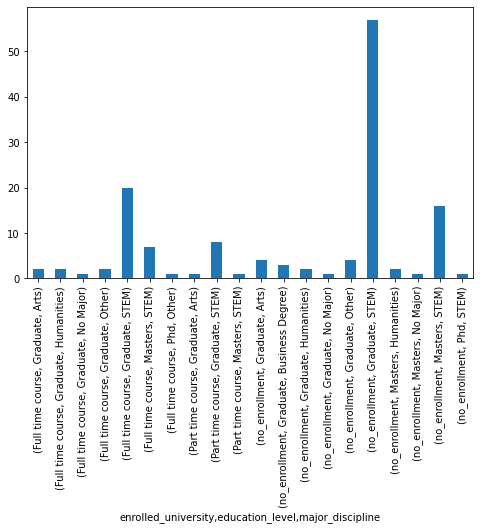

In [258]:
# show the counts of each group when gender is 'Other'
group = df[df['gender']=='Other'].groupby(['enrolled_university', 'education_level', 'major_discipline']).size()
figure(figsize=(8,5))
group.plot.bar()

<AxesSubplot:xlabel='enrolled_university,education_level,major_discipline'>

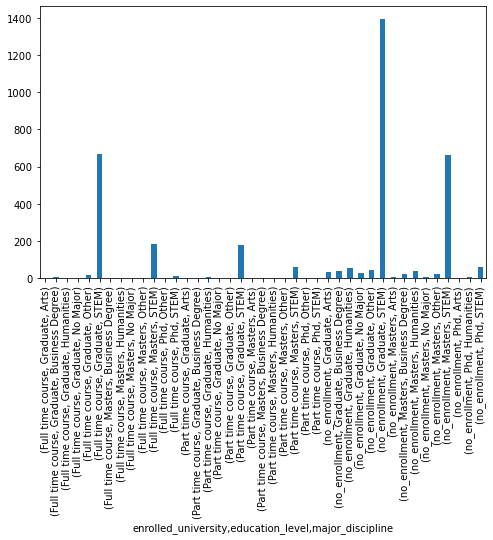

In [259]:
# show the counts of each group when gender is null 
group = df[df['gender'].isna()].groupby(['enrolled_university', 'education_level', 'major_discipline']).size()
figure(figsize=(8,5))
group.plot.bar()


In [260]:
# replace the null value of gender to 'Other'
df['gender'].fillna('Other' ,inplace=True)

<AxesSubplot:>

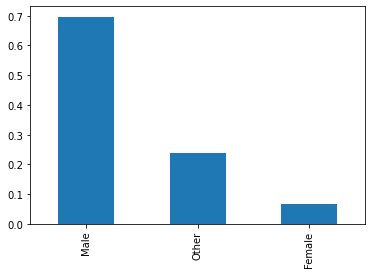

In [261]:
df['gender'].value_counts(normalize=True).plot(kind='bar')


plt.title(f"{col_name} Distribution")  ## new version

plt.title("{} Distribution".format(col_name))  ## old version

<AxesSubplot:>

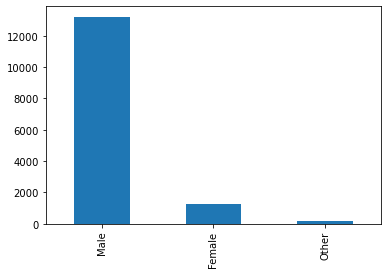

In [391]:
df_raw['gender'].value_counts().plot(kind='bar')

In [262]:
# One - Hot encoding 
gender_ohe = pd.get_dummies(df.gender, prefix='gender')

#merge one-hot encoded columns back with original DataFrame
df = df.loc[:, df.columns != 'gender'].join(gender_ohe)

#### Label Encoding
# le_gender = LabelEncoder().fit(df['gender'])
# df['gender'] = le_gender.transform(df['gender'])
# # Keep the record of labeling
# dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))

In [263]:
######## TODO: when gender is null, other column is null, how many is like that? is it work to impute, or remove instead?


#### relevent_experience

In [264]:
# convert to binary 0 and 1
df.relevent_experience.value_counts(dropna=False)

Has relevent experience    13734
No relevent experience      5174
Name: relevent_experience, dtype: int64

In [265]:
le = preprocessing.LabelEncoder()
le.fit_transform(df['relevent_experience'])

array([0, 1, 1, ..., 0, 0, 1])

In [266]:
df['relevent_experience']=le.fit_transform(df['relevent_experience'])

In [267]:
# create a label encoding reference 
dict(zip(le.classes_,le.transform(le.classes_))) # zip aggregate two list into a tuple

{'Has relevent experience': 0, 'No relevent experience': 1}

In [268]:
df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other
0,8949,3,0.920,0,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0
1,29725,1,0.776,1,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0
2,11561,3,0.624,1,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,1
3,33241,1,0.789,1,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0,1
4,666,0,0.767,0,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0.878,1,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,0,1,0
19154,31398,3,0.920,0,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,0,1,0
19155,24576,3,0.920,0,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,0,1,0
19156,5756,0,0.802,0,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0,1,0


#### enrolled_university

In [269]:
df.enrolled_university.value_counts(dropna=False,normalize=True)

no_enrollment       0.726095
Full time course    0.196689
Part time course    0.062883
NaN                 0.014333
Name: enrolled_university, dtype: float64

<AxesSubplot:>

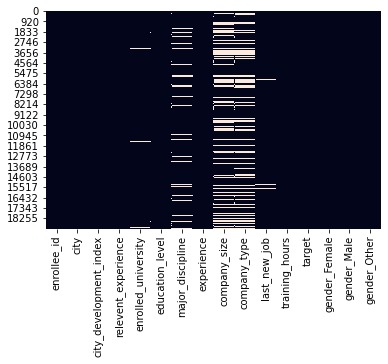

In [270]:
######## TODO: 1. imputation null as a new value'unknown' , remove due to other column are also null value
######## draw a chart to show missing value per row 
sns.heatmap(df.isnull(), cbar=False)


In [271]:
# replace the null value of enrolled_univeristy to 'Unknown'
df['enrolled_university'].fillna('Unknown' ,inplace=True)

In [272]:
# show percentage of all value (includign null value)
df.enrolled_university.value_counts(dropna=False,normalize=True)

no_enrollment       0.726095
Full time course    0.196689
Part time course    0.062883
Unknown             0.014333
Name: enrolled_university, dtype: float64

In [273]:
le_enrolled_university = LabelEncoder().fit(df['enrolled_university'])
df['enrolled_university'] = le_enrolled_university.transform(df['enrolled_university'])
# Keep the record of labeling
dict(zip(le_enrolled_university.classes_, le_enrolled_university.transform(le_enrolled_university.classes_)))

{'Full time course': 0,
 'Part time course': 1,
 'Unknown': 2,
 'no_enrollment': 3}

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

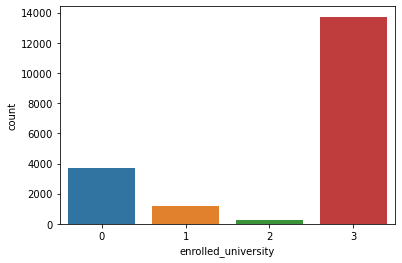

In [274]:
sns.countplot(x='enrolled_university',data=df)

#### education_level

In [275]:
le_education_level = LabelEncoder().fit(df['education_level'])
df['education_level'] = le_education_level.transform(df['education_level'])
# Keep the record of labeling
dict(zip(le_education_level.classes_, le_education_level.transform(le_education_level.classes_)))

{'Graduate': 0,
 'High School': 1,
 'Masters': 2,
 'Phd': 3,
 'Primary School': 4,
 nan: 5}

In [276]:
df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other
0,8949,3,0.920,0,3,0,STEM,>20,NaN,NaN,1,36,1.0,0,1,0
1,29725,1,0.776,1,3,0,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0
2,11561,3,0.624,1,0,0,STEM,5,NaN,NaN,never,83,0.0,0,0,1
3,33241,1,0.789,1,2,0,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0,1
4,666,0,0.767,0,3,2,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0.878,1,3,0,Humanities,14,NaN,NaN,1,42,1.0,0,1,0
19154,31398,3,0.920,0,3,0,STEM,14,NaN,NaN,4,52,1.0,0,1,0
19155,24576,3,0.920,0,3,0,STEM,>20,50-99,Pvt Ltd,4,44,0.0,0,1,0
19156,5756,0,0.802,0,3,1,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0,1,0


#### major_discipline

In [277]:
df.major_discipline.value_counts( dropna=False)

STEM               14483
NaN                 2572
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [278]:
df['major_discipline'].fillna('other' ,inplace=True)

In [279]:
# One - Hot encoding 
major_ohe = pd.get_dummies(df.major_discipline, prefix='major')

#merge one-hot encoded columns back with original DataFrame
df = df.loc[:, df.columns != 'major_discipline'].join(major_ohe)

#### company_size

In [280]:
df.company_size.value_counts( dropna=False)

NaN          5695
50-99        3083
100-500      2568
10000+       2018
10/49        1469
1000-4999    1328
<10          1307
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [281]:
df['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+',],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)
df['company_size'] = df['company_size'].fillna(df['company_size'].value_counts().index[0]) # inpute with mode
CSizeLabelEncoder = LabelEncoder().fit(df['company_size'])
CSizeList = CSizeLabelEncoder.classes_
df['company_size'] = CSizeLabelEncoder.transform(df['company_size'])

#### experience

In [282]:
df.experience.value_counts()

>20    3269
5      1411
4      1381
3      1321
6      1204
2      1080
7      1023
10      985
9       976
8       795
15      683
11      662
14      586
1       526
16      505
<1      498
12      491
13      398
17      341
19      303
18      278
20      146
Name: experience, dtype: int64

In [283]:
df['experience'].replace(['>20','<1'],[20,1],inplace=True)
df['experience'].fillna(df['experience'].value_counts().index[0],inplace=True) # fillna with mode
df['experience'] = [float(i) for i in df['experience']] # convert to float

#### company_type

In [284]:
df.company_type.value_counts(dropna=False)

Pvt Ltd                9814
NaN                    5894
Funded Startup         1001
Public Sector           954
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [285]:
# fillna as other
df['company_type'].fillna('Other' ,inplace=True)

In [286]:
company_ohe = pd.get_dummies(df.company_type, prefix='company_type')

#merge one-hot encoded columns back with original DataFrame
df = df.loc[:, df.columns != 'company_type'].join(company_ohe)

#### last new job

In [300]:
df.last_new_job.value_counts()

1        8004
>4       3279
2        2890
never    2351
4        1028
3        1021
Name: last_new_job, dtype: int64

In [302]:
df['last_new_job'].replace(['>4','never'],['4','0'],inplace=True)
df['last_new_job'].fillna(df['last_new_job'].value_counts().index[0],inplace=True)
df['last_new_job'] = [float(i) for i in df['last_new_job']]

#### Validate the Data is ready for modeling

In [306]:
df.dtypes

enrollee_id                           int64
city                                  int64
city_development_index              float64
relevent_experience                   int64
enrolled_university                   int64
education_level                       int64
experience                          float64
company_size                          int64
last_new_job                        float64
training_hours                        int64
target                              float64
gender_Female                         uint8
gender_Male                           uint8
gender_Other                          uint8
major_Arts                            uint8
major_Business Degree                 uint8
major_Humanities                      uint8
major_No Major                        uint8
major_Other                           uint8
major_STEM                            uint8
major_other                           uint8
company_type_Early Stage Startup      uint8
company_type_Funded Startup     

In [310]:
df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,major_No Major,major_Other,major_STEM,major_other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,3,0.920,0,3,0,20.0,2,1.0,36,...,0,0,1,0,0,0,0,1,0,0
1,29725,1,0.776,1,3,0,15.0,2,4.0,47,...,0,0,1,0,0,0,0,0,0,1
2,11561,3,0.624,1,0,0,5.0,2,0.0,83,...,0,0,1,0,0,0,0,1,0,0
3,33241,1,0.789,1,2,0,1.0,2,0.0,52,...,0,0,0,0,0,0,0,0,0,1
4,666,0,0.767,0,3,2,20.0,2,4.0,8,...,0,0,1,0,0,1,0,0,0,0


## Training and Testing Split

#### Random spliting

In [307]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'target']
y = df.loc[:, df.columns == 'target']
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.2,random_state=42,
                                                    shuffle=True)

#### Stratify splitting

In [312]:
from sklearn.model_selection import StratifiedShuffleSplit

strat=StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for train_index,test_index in strat.split(df, df['education_level']):
    strat_train  = df.iloc[train_index]
    strat_test = df.iloc[test_index]

In [318]:
## compare the stratify vs random sampling from original proportions
## stratified sampling has almost close to original proportion while the random is skewed

orignial = pd.DataFrame(df.education_level.value_counts(normalize=True))\
                    .rename(columns={'education_level': 'Original'})

stratify = pd.DataFrame(strat_train.education_level.value_counts(normalize=True))\
                    .rename(columns={'education_level': 'Stratify'})

random =  pd.DataFrame(X_train_rand.education_level.value_counts(normalize=True))\
                    .rename(columns={'education_level': 'Random'})

error_summary = pd.concat([orignial, stratify,random], axis=1)
                                                                                                   
error_summary['stratfy_error%'] = (error_summary['Stratify']- error_summary['Original'] )/ error_summary['Stratify']
error_summary['random_error%'] = (error_summary['Random']- error_summary['Original'] )/ error_summary['Random']

error_summary
                                                                                                   

,Original,Stratify,Random,stratfy_error%,random_error%
0,0.613021,0.612968,0.618009,-0.000086,0.008071
2,0.230432,0.230379,0.228811,-0.000230,-0.007081
1,0.103818,0.103871,0.101018,0.000509,-0.027722
3,0.021843,0.021895,0.022544,0.002415,0.031111
4,0.015866,0.015866,0.015734,0.000000,-0.008377
5,0.015020,0.015020,0.013883,0.000000,-0.081876


## Oversampling

In [389]:
df.target.value_counts()

0.0    14190
1.0     4718
Name: target, dtype: int64

In [ ]:
from imblearb.ovsampling import SMOTE

## Train and Testing Split

## Random Forest

## XGBOOST

In [356]:
%pip install xgboost

     |████████████████████████████████| 1.7 MB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [385]:
df_raw['stratefy_col'] = df_raw['gender'] + '_' + df_raw['target'].apply(lambda x: str(x))

In [388]:
df_raw.stratefy_col.value_counts()

Male_0.0      10209
Male_1.0       3012
Female_0.0      912
Female_1.0      326
Other_0.0       141
Other_1.0        50
Name: stratefy_col, dtype: int64

### EDA Visualization

In [288]:
# ######## TODO: what if I want to show distribution as percentage?

# # plot counts of value in selected column
# plt.figure(figsize=[20,20])
# col = ['relevent_experience','education_level','major_discipline','experience', 'company_size', 'company_type',
#        'training_hours', 'target']

# n=1
# for col_name in col:
#     plt.subplot(4,2,n)
#     sns.countplot(x=col_name,data=df)
#     plt.title(f"{col_name} Distribution") 
#     n=n+1
    
# plt.show()

In [289]:
# plt.figure(figsize=[20,20])
# col = ['relevent_experience','education_level','major_discipline','experience', 'company_size', 'company_type',
#        'training_hours', 'target']

# n=1
# for col_name in col:
#     plt.subplot(4,2,n)
#     sns.countplot(x=col_name,data=df, hue='gender')
#     plt.title(f"{col_name} Distribution by gender") 
#     n=n+1
    
# plt.show()